# Projects in data science: Features

Help for some exercises can be found in the notebook seen during class: https://colab.research.google.com/drive/1yJlXBwwAgGljolCATrn5h5BFBVAeImaU?usp=sharing

## Measuring area and perimeter

**Exercises**:
1. Create an empty mask that has a large circle in the middle (for example diameter 100 pixels). You could use the code for [Active Contour](https://colab.research.google.com/drive/1kE5S3ANwKueksDljVlzTCSi8XfufclSW?usp=sharing) or a [structural element](https://scikit-image.org/docs/stable/auto_examples/numpy_operations/plot_structuring_elements.html)
2. Use mathematical formulas to calculate what you would expect the area and perimeter of the circle to be, based on its diameter.
3. Now measure the area and perimeter of the circle you created using the mask. Do you get the same results? Why/why not?
4. Vary the structural element you used for eroding the mask, how does its size/shape affect the perimeter measurement?
5. Calculate the compactness of the circle based on the mask-based area and perimeter. Is the value what you would expect?
6. Now vary the size of the circle, measure area/perimeter again, and look at the compactness value. What happens?

Expected perimeter:314.1592653589793	 Expected area:7853.981633974483
Computed perimeter:280	 Computed area:7845
Compactness:0.7952675295350283


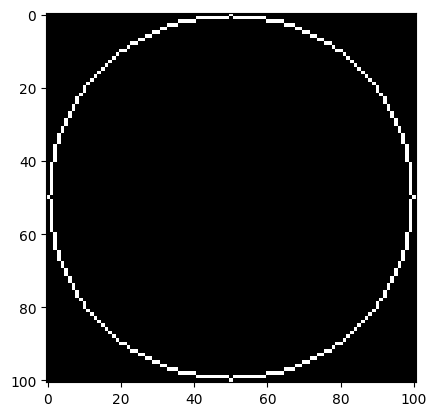

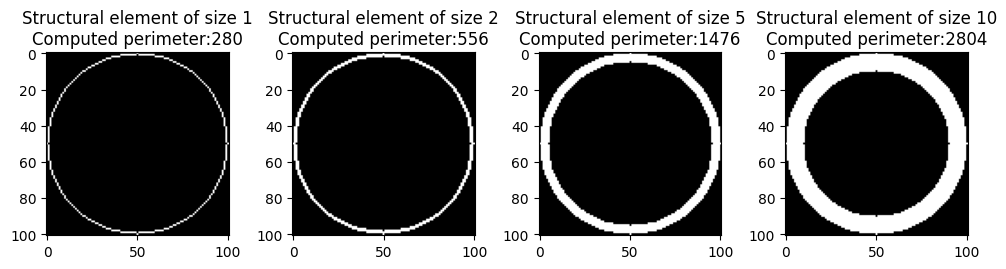

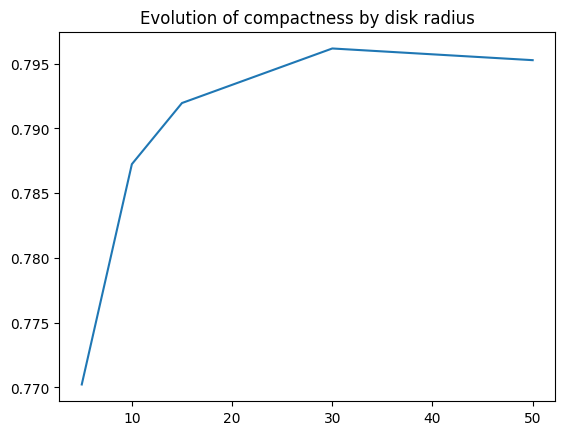

In [1]:
#Your answer
from skimage import morphology
import matplotlib.pyplot as plt
import math
import numpy as np
#1
radius = 50
mask = morphology.disk(radius)
plt.imshow(mask,cmap="gray")

#2
expected_perimeter = 2*math.pi*radius
expected_area = math.pi*(radius**2)
print(f"Expected perimeter:{expected_perimeter}\t Expected area:{expected_area}")

#3
struct_el = morphology.disk(1)
mask_eroded = morphology.binary_erosion(mask, struct_el)
mask_border = mask - mask_eroded
plt.imshow(mask_border,cmap="gray")
computed_perimeter1 = np.sum(mask_border)
computed_area1 = np.sum(mask)
print(f"Computed perimeter:{computed_perimeter1}\t Computed area:{computed_area1}")

#4
elem_size = [1,2,5,10]
fig = plt.figure(figsize=(10,10))
for i,s in enumerate(elem_size,1):
    fig.add_subplot(1,len(elem_size),i)
    struct_el = morphology.disk(s)
    mask_eroded = morphology.binary_erosion(mask, struct_el)
    mask_border = mask - mask_eroded
    plt.imshow(mask_border,cmap="gray")
    computed_perimeter = np.sum(mask_border)
    plt.title(f"Structural element of size {s}\nComputed perimeter:{computed_perimeter}")
fig.tight_layout()

#5
compactness = (computed_perimeter1**2)/(4*math.pi*computed_area1)
print(f"Compactness:{compactness}")

#6
radius_lst = [50,30,15,10,5]
compactness_lst = []
struct_el = morphology.disk(1)
for i,r in enumerate(radius_lst,1):
    mask = morphology.disk(r)
    mask_eroded = morphology.binary_erosion(mask, struct_el)
    mask_border = mask - mask_eroded
    computed_perimeter = np.sum(mask_border)
    computed_area = np.sum(mask)
    compactness = (computed_perimeter**2)/(4*math.pi*computed_area)
    compactness_lst.append(compactness)

plt.figure()
plt.plot(radius_lst,compactness_lst)
plt.title("Evolution of compactness by disk radius")
plt.show()

**Your comments**:

## Measuring color

**Exercises**:
1. Calculate the average RGB value of the pixels inside the lesion. Now create a copy of the original image, and replace each lesion pixel by the average RGB value. Is this new image a good reflection of the original (would you describe the color as the same)?
2. Experiment with different parameters of the [SLIC segmentation](https://scikit-image.org/docs/dev/api/skimage.segmentation.html#skimage.segmentation.slic), so that you get multiple segments inside the lesion. Now create a copy, and replace each lesion pixel by the average value inside its segment.
3. Try the above with different images, what do you see about the number of segments inside the lesion, and their size? Based on this, how could you design one or more color features to describe the image (with a fixed length representation)?

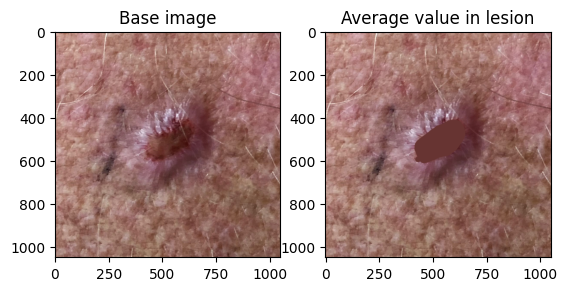

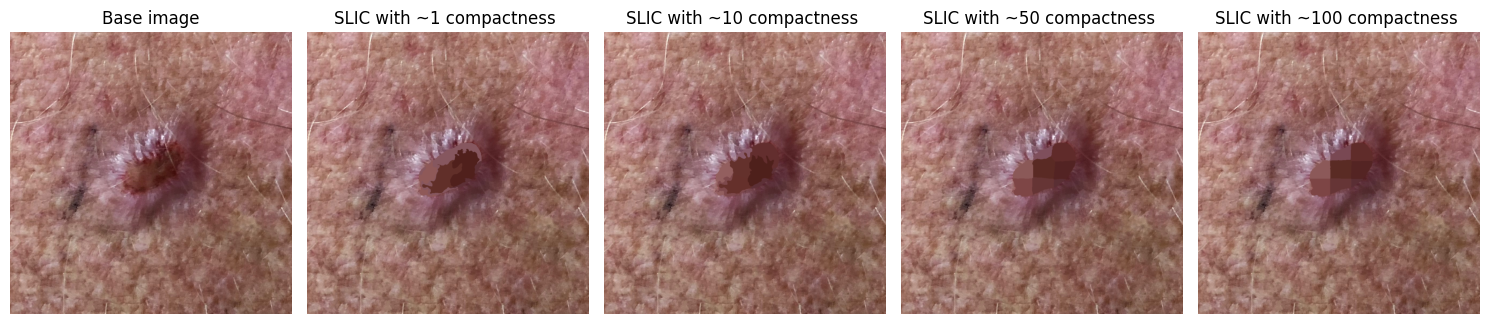

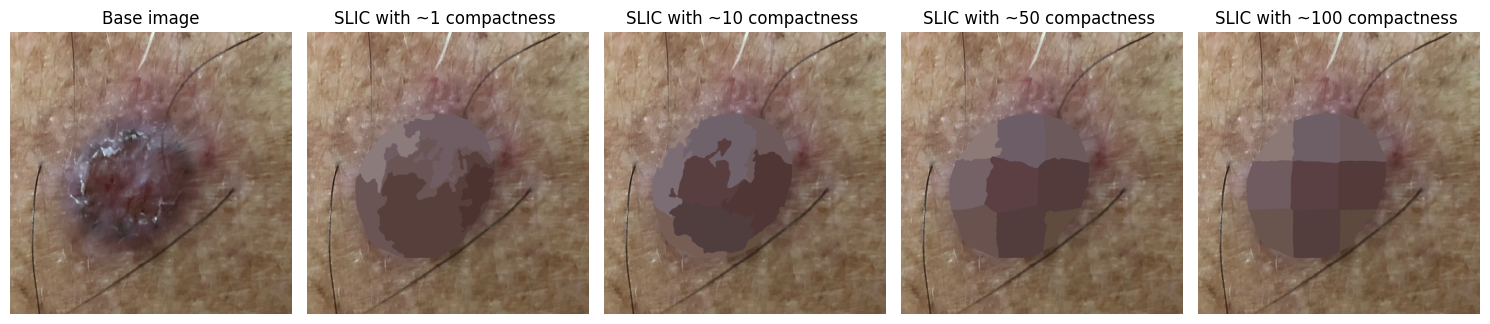

In [2]:
#Your answer
from skimage import segmentation, color
#1
rgb_img = plt.imread("./example_data/PAT_8_15_820.png")[:,:,:3]
mask = plt.imread("./example_data/PAT_8_15_820_mask.png")

img_avg_lesion = rgb_img.copy()
for i in range(3):
    channel = img_avg_lesion[:,:,i]
    mean = np.mean(channel[mask.astype(bool)])
    channel[mask.astype(bool)] = mean
    img_avg_lesion[:,:,i] = channel

fig = plt.figure()
fig.add_subplot(121)
plt.imshow(rgb_img)
plt.title("Base image")
fig.add_subplot(122)
plt.imshow(img_avg_lesion)
plt.title("Average value in lesion")

#2
lesion_coords = np.where(mask != 0)
min_x = min(lesion_coords[0])
max_x = max(lesion_coords[0])
min_y = min(lesion_coords[1])
max_y = max(lesion_coords[1])
cropped_lesion = rgb_img[min_x:max_x,min_y:max_y]


lst_compactness = [1,10,50,100]
fig = plt.figure(figsize=(15,15))
fig.add_subplot(1,len(lst_compactness)+1,1)
plt.axis("off")
plt.title(f"Base image")
plt.imshow(rgb_img)

img_avg_lesion = rgb_img.copy()
for i,c in enumerate(lst_compactness,1):
    labels1 = segmentation.slic(cropped_lesion, compactness=c, n_segments=10, sigma=3,
                            start_label=1)
    out1 = color.label2rgb(labels1, cropped_lesion, kind='avg')
    img_avg_lesion[min_x:max_x,min_y:max_y] = out1
    img_avg_lesion[mask == 0] = rgb_img[mask==0]
    fig.add_subplot(1,len(lst_compactness)+1,i+1)
    plt.axis("off")
    plt.title(f"SLIC with ~{c} compactness ")
    plt.imshow(img_avg_lesion)
fig.tight_layout()

#3
rgb_img = plt.imread("./example_data/PAT_39_55_233.png")[:,:,:3]
mask = plt.imread("./example_data/PAT_39_55_233_mask.png")

lesion_coords = np.where(mask != 0)
min_x = min(lesion_coords[0])
max_x = max(lesion_coords[0])
min_y = min(lesion_coords[1])
max_y = max(lesion_coords[1])
cropped_lesion = rgb_img[min_x:max_x,min_y:max_y]


lst_compactness = [1,10,50,100]
fig = plt.figure(figsize=(15,15))
fig.add_subplot(1,len(lst_compactness)+1,1)
plt.axis("off")
plt.title(f"Base image")
plt.imshow(rgb_img)
img_avg_lesion = rgb_img.copy()
for i,c in enumerate(lst_compactness,1):
    labels1 = segmentation.slic(cropped_lesion, compactness=c, n_segments=10, sigma=3,
                            start_label=1)
    out1 = color.label2rgb(labels1, cropped_lesion, kind='avg')
    #out1 = segmentation.mark_boundaries(out1, labels1)
    img_avg_lesion[min_x:max_x,min_y:max_y] = out1
    img_avg_lesion[mask == 0] = rgb_img[mask==0]
    fig.add_subplot(1,len(lst_compactness)+1,i+1)
    plt.axis("off")
    plt.title(f"SLIC with ~{c} compactness ")
    plt.imshow(img_avg_lesion)
fig.tight_layout()

**Your comments**: